<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [328]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [329]:
#!pip install autogluon
#!pip install --upgrade mxnet

In [330]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [331]:
#metatrader5 file format
df=pd.read_csv('/content/EURCHF_Daily_199304280000_202205050000.csv')

In [332]:
print(df.head())
print(df.tail())
df.info()

  <DATE>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0  1993.04.28\t1.76110\t1.77070\t1.75740\t1.76600...                
1  1993.04.29\t1.76750\t1.77330\t1.76350\t1.76380...                
2  1993.04.30\t1.76290\t1.76990\t1.76050\t1.76610...                
3  1993.05.03\t1.76670\t1.77250\t1.76260\t1.76800...                
4  1993.05.04\t1.76740\t1.77060\t1.76170\t1.76440...                
     <DATE>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
7530  2022.04.29\t1.02030\t1.02699\t1.01890\t1.02657...                
7531  2022.05.02\t1.02252\t1.02916\t1.02121\t1.02755...                
7532  2022.05.03\t1.02751\t1.03144\t1.02541\t1.02948...                
7533  2022.05.04\t1.02953\t1.03767\t1.02810\t1.03272...                
7534  2022.05.05\t1.03240\t1.03446\t1.03107\t1.03341...                
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 1 columns):
 #   Column                                     

In [333]:
df.columns=['header']

In [334]:
df = df.header.str.split('\t', expand=True)

In [335]:
df

,0,1,2,3,4,5,6,7
0,1993.04.28,1.76110,1.77070,1.75740,1.76600,2171,0,50
1,1993.04.29,1.76750,1.77330,1.76350,1.76380,1591,0,50
2,1993.04.30,1.76290,1.76990,1.76050,1.76610,1561,0,50
3,1993.05.03,1.76670,1.77250,1.76260,1.76800,1851,0,50
4,1993.05.04,1.76740,1.77060,1.76170,1.76440,1481,0,50
...,...,...,...,...,...,...,...,...
7530,2022.04.29,1.02030,1.02699,1.01890,1.02657,69581,0,0
7531,2022.05.02,1.02252,1.02916,1.02121,1.02755,58524,0,0
7532,2022.05.03,1.02751,1.03144,1.02541,1.02948,55623,0,0
7533,2022.05.04,1.02953,1.03767,1.02810,1.03272,69320,0,0


In [336]:
df_raw1 = pd.DataFrame(data=df)
df_raw1

,0,1,2,3,4,5,6,7
0,1993.04.28,1.76110,1.77070,1.75740,1.76600,2171,0,50
1,1993.04.29,1.76750,1.77330,1.76350,1.76380,1591,0,50
2,1993.04.30,1.76290,1.76990,1.76050,1.76610,1561,0,50
3,1993.05.03,1.76670,1.77250,1.76260,1.76800,1851,0,50
4,1993.05.04,1.76740,1.77060,1.76170,1.76440,1481,0,50
...,...,...,...,...,...,...,...,...
7530,2022.04.29,1.02030,1.02699,1.01890,1.02657,69581,0,0
7531,2022.05.02,1.02252,1.02916,1.02121,1.02755,58524,0,0
7532,2022.05.03,1.02751,1.03144,1.02541,1.02948,55623,0,0
7533,2022.05.04,1.02953,1.03767,1.02810,1.03272,69320,0,0


In [337]:
df.drop([0,5,6,7], axis=1,inplace=True)
df = df.astype(float, errors = 'raise')

In [338]:
df.rename(columns={1:'p_o',2:'p_h',3:'p_l',4:'p_c'}, inplace=True)

In [339]:
print(df.columns)

Index(['p_o', 'p_h', 'p_l', 'p_c'], dtype='object')


In [340]:
#Features

#195 periods ago
df['p_Open_last_period195'] = df['p_o'].shift(195) 
df['p_High_last_period195'] = df['p_h'].shift(195)
df['p_Low_last_period195'] = df['p_l'].shift(195)
df['p_Close_last_period195'] = df['p_c'].shift(195)
#194 periods ago
df['p_Open_last_period194'] = df['p_o'].shift(194) 
df['p_High_last_period194'] = df['p_h'].shift(194)
df['p_Low_last_period194'] = df['p_l'].shift(194)
df['p_Close_last_period194'] = df['p_c'].shift(194)
#193 periods ago
df['p_Open_last_period193'] = df['p_o'].shift(193) 
df['p_High_last_period193'] = df['p_h'].shift(193)
df['p_Low_last_period193'] = df['p_l'].shift(193)
df['p_Close_last_period193'] = df['p_c'].shift(193)
#192 periods ago
df['p_Open_last_period192'] = df['p_o'].shift(192) 
df['p_High_last_period192'] = df['p_h'].shift(192)
df['p_Low_last_period192'] = df['p_l'].shift(192)
df['p_Close_last_period192'] = df['p_c'].shift(192)
#191 periods ago
df['p_Open_last_period191'] = df['p_o'].shift(191) 
df['p_High_last_period191'] = df['p_h'].shift(191)
df['p_Low_last_period191'] = df['p_l'].shift(191)
df['p_Close_last_period191'] = df['p_c'].shift(191)
#190 periods ago
df['p_Open_last_period190'] = df['p_o'].shift(190) 
df['p_High_last_period190'] = df['p_h'].shift(190)
df['p_Low_last_period190'] = df['p_l'].shift(190)
df['p_Close_last_period190'] = df['p_c'].shift(190)
#189 periods ago
df['p_Open_last_period189'] = df['p_o'].shift(189) 
df['p_High_last_period189'] = df['p_h'].shift(189)
df['p_Low_last_period189'] = df['p_l'].shift(189)
df['p_Close_last_period189'] = df['p_c'].shift(189)
#188 periods ago
df['p_Open_last_period188'] = df['p_o'].shift(188) 
df['p_High_last_period188'] = df['p_h'].shift(188)
df['p_Low_last_period188'] = df['p_l'].shift(188)
df['p_Close_last_period188'] = df['p_c'].shift(188)
#187 periods ago
df['p_Open_last_period187'] = df['p_o'].shift(187) 
df['p_High_last_period187'] = df['p_h'].shift(187)
df['p_Low_last_period187'] = df['p_l'].shift(187)
df['p_Close_last_period187'] = df['p_c'].shift(187)
#186 periods ago
df['p_Open_last_period186'] = df['p_o'].shift(186) 
df['p_High_last_period186'] = df['p_h'].shift(186)
df['p_Low_last_period186'] = df['p_l'].shift(186)
df['p_Close_last_period186'] = df['p_c'].shift(186)
#185 periods ago
df['p_Open_last_period185'] = df['p_o'].shift(185) 
df['p_High_last_period185'] = df['p_h'].shift(185)
df['p_Low_last_period185'] = df['p_l'].shift(185)
df['p_Close_last_period185'] = df['p_c'].shift(185)
#184 periods ago
df['p_Open_last_period184'] = df['p_o'].shift(184) 
df['p_High_last_period184'] = df['p_h'].shift(184)
df['p_Low_last_period184'] = df['p_l'].shift(184)
df['p_Close_last_period184'] = df['p_c'].shift(184)
#183 periods ago
df['p_Open_last_period183'] = df['p_o'].shift(183) 
df['p_High_last_period183'] = df['p_h'].shift(183)
df['p_Low_last_period183'] = df['p_l'].shift(183)
df['p_Close_last_period183'] = df['p_c'].shift(183)
#182 periods ago
df['p_Open_last_period182'] = df['p_o'].shift(182) 
df['p_High_last_period182'] = df['p_h'].shift(182)
df['p_Low_last_period182'] = df['p_l'].shift(182)
df['p_Close_last_period182'] = df['p_c'].shift(182)
#181 periods ago
df['p_Open_last_period181'] = df['p_o'].shift(181) 
df['p_High_last_period181'] = df['p_h'].shift(181)
df['p_Low_last_period181'] = df['p_l'].shift(181)
df['p_Close_last_period181'] = df['p_c'].shift(181)
#180 periods ago
df['p_Open_last_period180'] = df['p_o'].shift(180) 
df['p_High_last_period180'] = df['p_h'].shift(180)
df['p_Low_last_period180'] = df['p_l'].shift(180)
df['p_Close_last_period180'] = df['p_c'].shift(180)
#179 periods ago
df['p_Open_last_period179'] = df['p_o'].shift(179) 
df['p_High_last_period179'] = df['p_h'].shift(179)
df['p_Low_last_period179'] = df['p_l'].shift(179)
df['p_Close_last_period179'] = df['p_c'].shift(179)
#178 periods ago
df['p_Open_last_period178'] = df['p_o'].shift(178) 
df['p_High_last_period178'] = df['p_h'].shift(178)
df['p_Low_last_period178'] = df['p_l'].shift(178)
df['p_Close_last_period178'] = df['p_c'].shift(178)
#177 periods ago
df['p_Open_last_period177'] = df['p_o'].shift(177) 
df['p_High_last_period177'] = df['p_h'].shift(177)
df['p_Low_last_period177'] = df['p_l'].shift(177)
df['p_Close_last_period177'] = df['p_c'].shift(177)
#176 periods ago
df['p_Open_last_period176'] = df['p_o'].shift(176) 
df['p_High_last_period176'] = df['p_h'].shift(176)
df['p_Low_last_period176'] = df['p_l'].shift(176)
df['p_Close_last_period176'] = df['p_c'].shift(176)
#194 periods ago
df['p_Open_last_period175'] = df['p_o'].shift(175) 
df['p_High_last_period175'] = df['p_h'].shift(175)
df['p_Low_last_period175'] = df['p_l'].shift(175)
df['p_Close_last_period175'] = df['p_c'].shift(175)
#174 periods ago
df['p_Open_last_period174'] = df['p_o'].shift(174) 
df['p_High_last_period174'] = df['p_h'].shift(174)
df['p_Low_last_period174'] = df['p_l'].shift(174)
df['p_Close_last_period174'] = df['p_c'].shift(174)
#173 periods ago
df['p_Open_last_period173'] = df['p_o'].shift(173) 
df['p_High_last_period173'] = df['p_h'].shift(173)
df['p_Low_last_period173'] = df['p_l'].shift(173)
df['p_Close_last_period173'] = df['p_c'].shift(173)
#172 periods ago
df['p_Open_last_period172'] = df['p_o'].shift(172) 
df['p_High_last_period172'] = df['p_h'].shift(172)
df['p_Low_last_period172'] = df['p_l'].shift(172)
df['p_Close_last_period172'] = df['p_c'].shift(172)
#171 periods ago
df['p_Open_last_period171'] = df['p_o'].shift(171) 
df['p_High_last_period171'] = df['p_h'].shift(171)
df['p_Low_last_period171'] = df['p_l'].shift(171)
df['p_Close_last_period171'] = df['p_c'].shift(171)
#170 periods ago
df['p_Open_last_period170'] = df['p_o'].shift(170) 
df['p_High_last_period170'] = df['p_h'].shift(170)
df['p_Low_last_period170'] = df['p_l'].shift(170)
df['p_Close_last_period170'] = df['p_c'].shift(170)
#169 periods ago
df['p_Open_last_period169'] = df['p_o'].shift(169) 
df['p_High_last_period169'] = df['p_h'].shift(169)
df['p_Low_last_period169'] = df['p_l'].shift(169)
df['p_Close_last_period169'] = df['p_c'].shift(169)
#168 periods ago
df['p_Open_last_period168'] = df['p_o'].shift(168) 
df['p_High_last_period168'] = df['p_h'].shift(168)
df['p_Low_last_period168'] = df['p_l'].shift(168)
df['p_Close_last_period168'] = df['p_c'].shift(168)
#167 periods ago
df['p_Open_last_period167'] = df['p_o'].shift(167) 
df['p_High_last_period167'] = df['p_h'].shift(167)
df['p_Low_last_period167'] = df['p_l'].shift(167)
df['p_Close_last_period167'] = df['p_c'].shift(167)
#166 periods ago
df['p_Open_last_period166'] = df['p_o'].shift(166) 
df['p_High_last_period166'] = df['p_h'].shift(166)
df['p_Low_last_period166'] = df['p_l'].shift(166)
df['p_Close_last_period166'] = df['p_c'].shift(166)
#165 periods ago
df['p_Open_last_period165'] = df['p_o'].shift(165) 
df['p_High_last_period165'] = df['p_h'].shift(165)
df['p_Low_last_period165'] = df['p_l'].shift(165)
df['p_Close_last_period165'] = df['p_c'].shift(165)
#164 periods ago
df['p_Open_last_period164'] = df['p_o'].shift(164) 
df['p_High_last_period164'] = df['p_h'].shift(164)
df['p_Low_last_period164'] = df['p_l'].shift(164)
df['p_Close_last_period164'] = df['p_c'].shift(164)
#163 periods ago
df['p_Open_last_period163'] = df['p_o'].shift(163) 
df['p_High_last_period163'] = df['p_h'].shift(163)
df['p_Low_last_period163'] = df['p_l'].shift(163)
df['p_Close_last_period163'] = df['p_c'].shift(163)
#162 periods ago
df['p_Open_last_period162'] = df['p_o'].shift(162) 
df['p_High_last_period162'] = df['p_h'].shift(162)
df['p_Low_last_period162'] = df['p_l'].shift(162)
df['p_Close_last_period162'] = df['p_c'].shift(162)
#161 periods ago
df['p_Open_last_period161'] = df['p_o'].shift(161) 
df['p_High_last_period161'] = df['p_h'].shift(161)
df['p_Low_last_period161'] = df['p_l'].shift(161)
df['p_Close_last_period161'] = df['p_c'].shift(161)
#160 periods ago
df['p_Open_last_period160'] = df['p_o'].shift(160) 
df['p_High_last_period160'] = df['p_h'].shift(160)
df['p_Low_last_period160'] = df['p_l'].shift(160)
df['p_Close_last_period160'] = df['p_c'].shift(160)
#59 periods ago
df['p_Open_last_period159'] = df['p_o'].shift(159) 
df['p_High_last_period159'] = df['p_h'].shift(159)
df['p_Low_last_period159'] = df['p_l'].shift(159)
df['p_Close_last_period159'] = df['p_c'].shift(159)
#158 periods ago
df['p_Open_last_period158'] = df['p_o'].shift(158) 
df['p_High_last_period158'] = df['p_h'].shift(158)
df['p_Low_last_period158'] = df['p_l'].shift(158)
df['p_Close_last_period158'] = df['p_c'].shift(158)
#157 periods ago
df['p_Open_last_period157'] = df['p_o'].shift(157) 
df['p_High_last_period157'] = df['p_h'].shift(157)
df['p_Low_last_period157'] = df['p_l'].shift(157)
df['p_Close_last_period157'] = df['p_c'].shift(157)
#156 periods ago
df['p_Open_last_period156'] = df['p_o'].shift(156) 
df['p_High_last_period156'] = df['p_h'].shift(156)
df['p_Low_last_period156'] = df['p_l'].shift(156)
df['p_Close_last_period156'] = df['p_c'].shift(156)
#155 periods ago
df['p_Open_last_period155'] = df['p_o'].shift(155) 
df['p_High_last_period155'] = df['p_h'].shift(155)
df['p_Low_last_period155'] = df['p_l'].shift(155)
df['p_Close_last_period155'] = df['p_c'].shift(155)
#154 periods ago
df['p_Open_last_period154'] = df['p_o'].shift(154) 
df['p_High_last_period154'] = df['p_h'].shift(154)
df['p_Low_last_period154'] = df['p_l'].shift(154)
df['p_Close_last_period154'] = df['p_c'].shift(154)
#153 periods ago
df['p_Open_last_period153'] = df['p_o'].shift(153) 
df['p_High_last_period153'] = df['p_h'].shift(153)
df['p_Low_last_period153'] = df['p_l'].shift(153)
df['p_Close_last_period153'] = df['p_c'].shift(153)
#152 periods ago
df['p_Open_last_period152'] = df['p_o'].shift(152) 
df['p_High_last_period152'] = df['p_h'].shift(152)
df['p_Low_last_period152'] = df['p_l'].shift(152)
df['p_Close_last_period152'] = df['p_c'].shift(152)
#151 periods ago
df['p_Open_last_period151'] = df['p_o'].shift(151) 
df['p_High_last_period151'] = df['p_h'].shift(151)
df['p_Low_last_period151'] = df['p_l'].shift(151)
df['p_Close_last_period151'] = df['p_c'].shift(151)
#150 periods ago
df['p_Open_last_period150'] = df['p_o'].shift(150) 
df['p_High_last_period150'] = df['p_h'].shift(150)
df['p_Low_last_period150'] = df['p_l'].shift(150)
df['p_Close_last_period150'] = df['p_c'].shift(150)
#149 periods ago
df['p_Open_last_period149'] = df['p_o'].shift(149) 
df['p_High_last_period149'] = df['p_h'].shift(149)
df['p_Low_last_period149'] = df['p_l'].shift(149)
df['p_Close_last_period149'] = df['p_c'].shift(149)
#148 periods ago
df['p_Open_last_period148'] = df['p_o'].shift(148) 
df['p_High_last_period148'] = df['p_h'].shift(148)
df['p_Low_last_period148'] = df['p_l'].shift(148)
df['p_Close_last_period148'] = df['p_c'].shift(148)
#147 periods ago
df['p_Open_last_period147'] = df['p_o'].shift(147) 
df['p_High_last_period147'] = df['p_h'].shift(147)
df['p_Low_last_period147'] = df['p_l'].shift(147)
df['p_Close_last_period147'] = df['p_c'].shift(147)
#146 periods ago
df['p_Open_last_period146'] = df['p_o'].shift(146) 
df['p_High_last_period146'] = df['p_h'].shift(146)
df['p_Low_last_period146'] = df['p_l'].shift(146)
df['p_Close_last_period146'] = df['p_c'].shift(146)
#145 periods ago
df['p_Open_last_period145'] = df['p_o'].shift(145) 
df['p_High_last_period145'] = df['p_h'].shift(145)
df['p_Low_last_period145'] = df['p_l'].shift(145)
df['p_Close_last_period145'] = df['p_c'].shift(145)
#144 periods ago
df['p_Open_last_period144'] = df['p_o'].shift(144) 
df['p_High_last_period144'] = df['p_h'].shift(144)
df['p_Low_last_period144'] = df['p_l'].shift(144)
df['p_Close_last_period144'] = df['p_c'].shift(144)
#143 periods ago
df['p_Open_last_period143'] = df['p_o'].shift(143) 
df['p_High_last_period143'] = df['p_h'].shift(143)
df['p_Low_last_period143'] = df['p_l'].shift(143)
df['p_Close_last_period143'] = df['p_c'].shift(143)
#142 periods ago
df['p_Open_last_period142'] = df['p_o'].shift(142) 
df['p_High_last_period142'] = df['p_h'].shift(142)
df['p_Low_last_period142'] = df['p_l'].shift(142)
df['p_Close_last_period142'] = df['p_c'].shift(142)
#141 periods ago
df['p_Open_last_period141'] = df['p_o'].shift(141) 
df['p_High_last_period141'] = df['p_h'].shift(141)
df['p_Low_last_period141'] = df['p_l'].shift(141)
df['p_Close_last_period141'] = df['p_c'].shift(141)
#140 periods ago
df['p_Open_last_period140'] = df['p_o'].shift(140) 
df['p_High_last_period140'] = df['p_h'].shift(140)
df['p_Low_last_period140'] = df['p_l'].shift(140)
df['p_Close_last_period140'] = df['p_c'].shift(140)
#139 periods ago
df['p_Open_last_period139'] = df['p_o'].shift(139) 
df['p_High_last_period139'] = df['p_h'].shift(139)
df['p_Low_last_period139'] = df['p_l'].shift(139)
df['p_Close_last_period139'] = df['p_c'].shift(139)
#138 periods ago
df['p_Open_last_period138'] = df['p_o'].shift(138) 
df['p_High_last_period138'] = df['p_h'].shift(138)
df['p_Low_last_period138'] = df['p_l'].shift(138)
df['p_Close_last_period138'] = df['p_c'].shift(138)
#137 periods ago
df['p_Open_last_period137'] = df['p_o'].shift(137) 
df['p_High_last_period137'] = df['p_h'].shift(137)
df['p_Low_last_period137'] = df['p_l'].shift(137)
df['p_Close_last_period137'] = df['p_c'].shift(137)
#136 periods ago
df['p_Open_last_period136'] = df['p_o'].shift(136) 
df['p_High_last_period136'] = df['p_h'].shift(136)
df['p_Low_last_period136'] = df['p_l'].shift(136)
df['p_Close_last_period136'] = df['p_c'].shift(136)
#135 periods ago
df['p_Open_last_period135'] = df['p_o'].shift(135) 
df['p_High_last_period135'] = df['p_h'].shift(135)
df['p_Low_last_period135'] = df['p_l'].shift(135)
df['p_Close_last_period135'] = df['p_c'].shift(135)
#134 periods ago
df['p_Open_last_period134'] = df['p_o'].shift(134) 
df['p_High_last_period134'] = df['p_h'].shift(134)
df['p_Low_last_period134'] = df['p_l'].shift(134)
df['p_Close_last_period134'] = df['p_c'].shift(134)
#133 periods ago
df['p_Open_last_period133'] = df['p_o'].shift(133) 
df['p_High_last_period133'] = df['p_h'].shift(133)
df['p_Low_last_period133'] = df['p_l'].shift(133)
df['p_Close_last_period133'] = df['p_c'].shift(133)
#132 periods ago
df['p_Open_last_period132'] = df['p_o'].shift(132) 
df['p_High_last_period132'] = df['p_h'].shift(132)
df['p_Low_last_period132'] = df['p_l'].shift(132)
df['p_Close_last_period132'] = df['p_c'].shift(132)
#131 periods ago
df['p_Open_last_period131'] = df['p_o'].shift(131) 
df['p_High_last_period131'] = df['p_h'].shift(131)
df['p_Low_last_period131'] = df['p_l'].shift(131)
df['p_Close_last_period131'] = df['p_c'].shift(131)
#30 periods ago
df['p_Open_last_period130'] = df['p_o'].shift(130) 
df['p_High_last_period130'] = df['p_h'].shift(130)
df['p_Low_last_period130'] = df['p_l'].shift(130)
df['p_Close_last_period130'] = df['p_c'].shift(130)
#129 periods ago
df['p_Open_last_period129'] = df['p_o'].shift(129) 
df['p_High_last_period129'] = df['p_h'].shift(129)
df['p_Low_last_period129'] = df['p_l'].shift(129)
df['p_Close_last_period129'] = df['p_c'].shift(129)
#128 periods ago
df['p_Open_last_period128'] = df['p_o'].shift(128) 
df['p_High_last_period128'] = df['p_h'].shift(128)
df['p_Low_last_period128'] = df['p_l'].shift(128)
df['p_Close_last_period128'] = df['p_c'].shift(128)
#127 periods ago
df['p_Open_last_period127'] = df['p_o'].shift(127) 
df['p_High_last_period127'] = df['p_h'].shift(127)
df['p_Low_last_period127'] = df['p_l'].shift(127)
df['p_Close_last_period127'] = df['p_c'].shift(127)
#126 periods ago
df['p_Open_last_period126'] = df['p_o'].shift(126) 
df['p_High_last_period126'] = df['p_h'].shift(126)
df['p_Low_last_period126'] = df['p_l'].shift(126)
df['p_Close_last_period126'] = df['p_c'].shift(126)
#125 periods ago
df['p_Open_last_period125'] = df['p_o'].shift(125) 
df['p_High_last_period125'] = df['p_h'].shift(125)
df['p_Low_last_period125'] = df['p_l'].shift(125)
df['p_Close_last_period125'] = df['p_c'].shift(125)
#124 periods ago
df['p_Open_last_period124'] = df['p_o'].shift(124) 
df['p_High_last_period124'] = df['p_h'].shift(124)
df['p_Low_last_period124'] = df['p_l'].shift(124)
df['p_Close_last_period124'] = df['p_c'].shift(124)
#123 periods ago
df['p_Open_last_period123'] = df['p_o'].shift(123) 
df['p_High_last_period123'] = df['p_h'].shift(123)
df['p_Low_last_period123'] = df['p_l'].shift(123)
df['p_Close_last_period123'] = df['p_c'].shift(123)
#122 periods ago
df['p_Open_last_period122'] = df['p_o'].shift(122) 
df['p_High_last_period122'] = df['p_h'].shift(122)
df['p_Low_last_period122'] = df['p_l'].shift(122)
df['p_Close_last_period122'] = df['p_c'].shift(122)
#121 periods ago
df['p_Open_last_period121'] = df['p_o'].shift(121) 
df['p_High_last_period121'] = df['p_h'].shift(21)
df['p_Low_last_period121'] = df['p_l'].shift(121)
df['p_Close_last_period121'] = df['p_c'].shift(121)
#120 periods ago
df['p_Open_last_period120'] = df['p_o'].shift(120) 
df['p_High_last_period120'] = df['p_h'].shift(120)
df['p_Low_last_period120'] = df['p_l'].shift(120)
df['p_Close_last_period120'] = df['p_c'].shift(120)
#119 periods ago
df['p_Open_last_period119'] = df['p_o'].shift(119) 
df['p_High_last_period119'] = df['p_h'].shift(119)
df['p_Low_last_period119'] = df['p_l'].shift(119)
df['p_Close_last_period119'] = df['p_c'].shift(119)
#118 periods ago
df['p_Open_last_period118'] = df['p_o'].shift(118) 
df['p_High_last_period118'] = df['p_h'].shift(118)
df['p_Low_last_period118'] = df['p_l'].shift(118)
df['p_Close_last_period118'] = df['p_c'].shift(118)
#117 periods ago
df['p_Open_last_period117'] = df['p_o'].shift(117) 
df['p_High_last_period117'] = df['p_h'].shift(117)
df['p_Low_last_period117'] = df['p_l'].shift(117)
df['p_Close_last_period117'] = df['p_c'].shift(117)
#116 periods ago
df['p_Open_last_period116'] = df['p_o'].shift(116) 
df['p_High_last_period116'] = df['p_h'].shift(116)
df['p_Low_last_period116'] = df['p_l'].shift(116)
df['p_Close_last_period116'] = df['p_c'].shift(116)
#115 periods ago
df['p_Open_last_period115'] = df['p_o'].shift(115) 
df['p_High_last_period115'] = df['p_h'].shift(115)
df['p_Low_last_period115'] = df['p_l'].shift(115)
df['p_Close_last_period115'] = df['p_c'].shift(115)
#114 periods ago
df['p_Open_last_period114'] = df['p_o'].shift(114) 
df['p_High_last_period114'] = df['p_h'].shift(114)
df['p_Low_last_period1014'] = df['p_l'].shift(114)
df['p_Close_last_period114'] = df['p_c'].shift(114)
#113 periods ago
df['p_Open_last_period113'] = df['p_o'].shift(113) 
df['p_High_last_period113'] = df['p_h'].shift(113)
df['p_Low_last_period113'] = df['p_l'].shift(113)
df['p_Close_last_period113'] = df['p_c'].shift(113)
#112 periods ago
df['p_Open_last_period112'] = df['p_o'].shift(112) 
df['p_High_last_period112'] = df['p_h'].shift(112)
df['p_Low_last_period112'] = df['p_l'].shift(112)
df['p_Close_last_period112'] = df['p_c'].shift(112)
#111 periods ago
df['p_Open_last_period111'] = df['p_o'].shift(111) 
df['p_High_last_period111'] = df['p_h'].shift(111)
df['p_Low_last_period111'] = df['p_l'].shift(111)
df['p_Close_last_period111'] = df['p_c'].shift(111)
#110 periods ago
df['p_Open_last_period110'] = df['p_o'].shift(110) 
df['p_High_last_period110'] = df['p_h'].shift(110)
df['p_Low_last_period110'] = df['p_l'].shift(110)
df['p_Close_last_period110'] = df['p_c'].shift(110)
#109 periods ago
df['p_Open_last_period109'] = df['p_o'].shift(109) 
df['p_High_last_period109'] = df['p_h'].shift(109)
df['p_Low_last_period109'] = df['p_l'].shift(109)
df['p_Close_last_period109'] = df['p_c'].shift(109)
#108 periods ago
df['p_Open_last_period108'] = df['p_o'].shift(108) 
df['p_High_last_period108'] = df['p_h'].shift(108)
df['p_Low_last_period108'] = df['p_l'].shift(108)
df['p_Close_last_period108'] = df['p_c'].shift(108)
#107 periods ago
df['p_Open_last_period107'] = df['p_o'].shift(107) 
df['p_High_last_period107'] = df['p_h'].shift(107)
df['p_Low_last_period107'] = df['p_l'].shift(107)
df['p_Close_last_period107'] = df['p_c'].shift(107)
#106 periods ago
df['p_Open_last_period106'] = df['p_o'].shift(106) 
df['p_High_last_period106'] = df['p_h'].shift(106)
df['p_Low_last_period106'] = df['p_l'].shift(106)
df['p_Close_last_period106'] = df['p_c'].shift(106)
#105 periods ago
df['p_Open_last_period105'] = df['p_o'].shift(105) 
df['p_High_last_period105'] = df['p_h'].shift(105)
df['p_Low_last_period105'] = df['p_l'].shift(105)
df['p_Close_last_period105'] = df['p_c'].shift(105)
#104 periods ago
df['p_Open_last_period104'] = df['p_o'].shift(104) 
df['p_High_last_period104'] = df['p_h'].shift(104)
df['p_Low_last_period104'] = df['p_l'].shift(104)
df['p_Close_last_period104'] = df['p_c'].shift(104)
#103 periods ago
df['p_Open_last_period103'] = df['p_o'].shift(103) 
df['p_High_last_period103'] = df['p_h'].shift(103)
df['p_Low_last_period103'] = df['p_l'].shift(103)
df['p_Close_last_period103'] = df['p_c'].shift(103)
#102 periods ago
df['p_Open_last_period102'] = df['p_o'].shift(102) 
df['p_High_last_period102'] = df['p_h'].shift(102)
df['p_Low_last_period102'] = df['p_l'].shift(102)
df['p_Close_last_period102'] = df['p_c'].shift(102)
#101 periods ago
df['p_Open_last_period101'] = df['p_o'].shift(101) 
df['p_High_last_period101'] = df['p_h'].shift(101)
df['p_Low_last_period101'] = df['p_l'].shift(101)
df['p_Close_last_period101'] = df['p_c'].shift(101)
#100 periods ago
df['p_Open_last_period100'] = df['p_o'].shift(100) 
df['p_High_last_period100'] = df['p_h'].shift(100)
df['p_Low_last_period100'] = df['p_l'].shift(100)
df['p_Close_last_period100'] = df['p_c'].shift(100)
#99 periods ago
df['p_Open_last_period99'] = df['p_o'].shift(99) 
df['p_High_last_period99'] = df['p_h'].shift(99)
df['p_Low_last_period99'] = df['p_l'].shift(99)
df['p_Close_last_period99'] = df['p_c'].shift(99)
#98 periods ago
df['p_Open_last_period98'] = df['p_o'].shift(98) 
df['p_High_last_period98'] = df['p_h'].shift(98)
df['p_Low_last_period98'] = df['p_l'].shift(98)
df['p_Close_last_period98'] = df['p_c'].shift(98)
#97 periods ago
df['p_Open_last_period97'] = df['p_o'].shift(97) 
df['p_High_last_period97'] = df['p_h'].shift(97)
df['p_Low_last_period97'] = df['p_l'].shift(97)
df['p_Close_last_period97'] = df['p_c'].shift(97)
#96 periods ago
df['p_Open_last_period96'] = df['p_o'].shift(96) 
df['p_High_last_period96'] = df['p_h'].shift(96)
df['p_Low_last_period96'] = df['p_l'].shift(96)
df['p_Close_last_period96'] = df['p_c'].shift(96)
#95 periods ago
df['p_Open_last_period95'] = df['p_o'].shift(95) 
df['p_High_last_period95'] = df['p_h'].shift(95)
df['p_Low_last_period95'] = df['p_l'].shift(95)
df['p_Close_last_period95'] = df['p_c'].shift(95)
#94 periods ago
df['p_Open_last_period94'] = df['p_o'].shift(94) 
df['p_High_last_period94'] = df['p_h'].shift(94)
df['p_Low_last_period94'] = df['p_l'].shift(94)
df['p_Close_last_period94'] = df['p_c'].shift(94)
#93 periods ago
df['p_Open_last_period93'] = df['p_o'].shift(93) 
df['p_High_last_period93'] = df['p_h'].shift(93)
df['p_Low_last_period93'] = df['p_l'].shift(93)
df['p_Close_last_period93'] = df['p_c'].shift(93)
#92 periods ago
df['p_Open_last_period92'] = df['p_o'].shift(92) 
df['p_High_last_period92'] = df['p_h'].shift(92)
df['p_Low_last_period92'] = df['p_l'].shift(92)
df['p_Close_last_period92'] = df['p_c'].shift(92)
#91 periods ago
df['p_Open_last_period91'] = df['p_o'].shift(91) 
df['p_High_last_period91'] = df['p_h'].shift(91)
df['p_Low_last_period91'] = df['p_l'].shift(91)
df['p_Close_last_period91'] = df['p_c'].shift(91)
#90 periods ago
df['p_Open_last_period90'] = df['p_o'].shift(90) 
df['p_High_last_period90'] = df['p_h'].shift(90)
df['p_Low_last_period90'] = df['p_l'].shift(90)
df['p_Close_last_period90'] = df['p_c'].shift(90)
#89 periods ago
df['p_Open_last_period89'] = df['p_o'].shift(89) 
df['p_High_last_period89'] = df['p_h'].shift(89)
df['p_Low_last_period89'] = df['p_l'].shift(89)
df['p_Close_last_period89'] = df['p_c'].shift(89)
#88 periods ago
df['p_Open_last_period88'] = df['p_o'].shift(88) 
df['p_High_last_period88'] = df['p_h'].shift(88)
df['p_Low_last_period88'] = df['p_l'].shift(88)
df['p_Close_last_period88'] = df['p_c'].shift(88)
#87 periods ago
df['p_Open_last_period87'] = df['p_o'].shift(87) 
df['p_High_last_period87'] = df['p_h'].shift(87)
df['p_Low_last_period87'] = df['p_l'].shift(87)
df['p_Close_last_period87'] = df['p_c'].shift(87)
#86 periods ago
df['p_Open_last_period86'] = df['p_o'].shift(86) 
df['p_High_last_period86'] = df['p_h'].shift(86)
df['p_Low_last_period86'] = df['p_l'].shift(86)
df['p_Close_last_period86'] = df['p_c'].shift(86)
#85 periods ago
df['p_Open_last_period85'] = df['p_o'].shift(85) 
df['p_High_last_period85'] = df['p_h'].shift(85)
df['p_Low_last_period85'] = df['p_l'].shift(85)
df['p_Close_last_period85'] = df['p_c'].shift(85)
#84 periods ago
df['p_Open_last_period84'] = df['p_o'].shift(84) 
df['p_High_last_period84'] = df['p_h'].shift(84)
df['p_Low_last_period84'] = df['p_l'].shift(84)
df['p_Close_last_period84'] = df['p_c'].shift(84)
#83 periods ago
df['p_Open_last_period83'] = df['p_o'].shift(83) 
df['p_High_last_period83'] = df['p_h'].shift(83)
df['p_Low_last_period83'] = df['p_l'].shift(83)
df['p_Close_last_period83'] = df['p_c'].shift(83)
#82 periods ago
df['p_Open_last_period82'] = df['p_o'].shift(82) 
df['p_High_last_period82'] = df['p_h'].shift(82)
df['p_Low_last_period82'] = df['p_l'].shift(82)
df['p_Close_last_period82'] = df['p_c'].shift(82)
#81 periods ago
df['p_Open_last_period81'] = df['p_o'].shift(81) 
df['p_High_last_period81'] = df['p_h'].shift(81)
df['p_Low_last_period81'] = df['p_l'].shift(81)
df['p_Close_last_period81'] = df['p_c'].shift(81)
#80 periods ago
df['p_Open_last_period80'] = df['p_o'].shift(80) 
df['p_High_last_period80'] = df['p_h'].shift(80)
df['p_Low_last_period80'] = df['p_l'].shift(80)
df['p_Close_last_period80'] = df['p_c'].shift(80)
#79 periods ago
df['p_Open_last_period79'] = df['p_o'].shift(79) 
df['p_High_last_period79'] = df['p_h'].shift(79)
df['p_Low_last_period79'] = df['p_l'].shift(79)
df['p_Close_last_period79'] = df['p_c'].shift(79)
#78 periods ago
df['p_Open_last_period78'] = df['p_o'].shift(78) 
df['p_High_last_period78'] = df['p_h'].shift(78)
df['p_Low_last_period78'] = df['p_l'].shift(78)
df['p_Close_last_period78'] = df['p_c'].shift(78)
#77 periods ago
df['p_Open_last_period77'] = df['p_o'].shift(77) 
df['p_High_last_period77'] = df['p_h'].shift(77)
df['p_Low_last_period77'] = df['p_l'].shift(77)
df['p_Close_last_period77'] = df['p_c'].shift(77)
#76 periods ago
df['p_Open_last_period76'] = df['p_o'].shift(76) 
df['p_High_last_period76'] = df['p_h'].shift(76)
df['p_Low_last_period76'] = df['p_l'].shift(76)
df['p_Close_last_period76'] = df['p_c'].shift(76)
#75 periods ago
df['p_Open_last_period75'] = df['p_o'].shift(75) 
df['p_High_last_period75'] = df['p_h'].shift(75)
df['p_Low_last_period75'] = df['p_l'].shift(75)
df['p_Close_last_period75'] = df['p_c'].shift(75)
#74 periods ago
df['p_Open_last_period74'] = df['p_o'].shift(74) 
df['p_High_last_period74'] = df['p_h'].shift(74)
df['p_Low_last_period74'] = df['p_l'].shift(74)
df['p_Close_last_period74'] = df['p_c'].shift(74)
#73 periods ago
df['p_Open_last_period73'] = df['p_o'].shift(73) 
df['p_High_last_period73'] = df['p_h'].shift(73)
df['p_Low_last_period73'] = df['p_l'].shift(73)
df['p_Close_last_period73'] = df['p_c'].shift(73)
#72 periods ago
df['p_Open_last_period72'] = df['p_o'].shift(72) 
df['p_High_last_period72'] = df['p_h'].shift(72)
df['p_Low_last_period72'] = df['p_l'].shift(72)
df['p_Close_last_period72'] = df['p_c'].shift(72)
#71 periods ago
df['p_Open_last_period71'] = df['p_o'].shift(71) 
df['p_High_last_period71'] = df['p_h'].shift(71)
df['p_Low_last_period71'] = df['p_l'].shift(71)
df['p_Close_last_period71'] = df['p_c'].shift(71)
#70 periods ago
df['p_Open_last_period70'] = df['p_o'].shift(70) 
df['p_High_last_period70'] = df['p_h'].shift(70)
df['p_Low_last_period70'] = df['p_l'].shift(70)
df['p_Close_last_period70'] = df['p_c'].shift(70)
#69 periods ago
df['p_Open_last_period69'] = df['p_o'].shift(69) 
df['p_High_last_period69'] = df['p_h'].shift(69)
df['p_Low_last_period69'] = df['p_l'].shift(69)
df['p_Close_last_period69'] = df['p_c'].shift(69)
#68 periods ago
df['p_Open_last_period68'] = df['p_o'].shift(68) 
df['p_High_last_period68'] = df['p_h'].shift(68)
df['p_Low_last_period68'] = df['p_l'].shift(68)
df['p_Close_last_period68'] = df['p_c'].shift(68)
#67 periods ago
df['p_Open_last_period67'] = df['p_o'].shift(67) 
df['p_High_last_period67'] = df['p_h'].shift(67)
df['p_Low_last_period67'] = df['p_l'].shift(67)
df['p_Close_last_period67'] = df['p_c'].shift(67)
#66 periods ago
df['p_Open_last_period66'] = df['p_o'].shift(66) 
df['p_High_last_period66'] = df['p_h'].shift(66)
df['p_Low_last_period66'] = df['p_l'].shift(66)
df['p_Close_last_period66'] = df['p_c'].shift(66)
#65 periods ago
df['p_Open_last_period65'] = df['p_o'].shift(65) 
df['p_High_last_period65'] = df['p_h'].shift(65)
df['p_Low_last_period65'] = df['p_l'].shift(65)
df['p_Close_last_period65'] = df['p_c'].shift(65)
#64 periods ago
df['p_Open_last_period64'] = df['p_o'].shift(64) 
df['p_High_last_period64'] = df['p_h'].shift(64)
df['p_Low_last_period64'] = df['p_l'].shift(64)
df['p_Close_last_period64'] = df['p_c'].shift(64)
#63 periods ago
df['p_Open_last_period63'] = df['p_o'].shift(63) 
df['p_High_last_period63'] = df['p_h'].shift(63)
df['p_Low_last_period63'] = df['p_l'].shift(63)
df['p_Close_last_period63'] = df['p_c'].shift(63)
#62 periods ago
df['p_Open_last_period62'] = df['p_o'].shift(62) 
df['p_High_last_period62'] = df['p_h'].shift(62)
df['p_Low_last_period62'] = df['p_l'].shift(62)
df['p_Close_last_period62'] = df['p_c'].shift(62)
#61 periods ago
df['p_Open_last_period61'] = df['p_o'].shift(61) 
df['p_High_last_period61'] = df['p_h'].shift(61)
df['p_Low_last_period61'] = df['p_l'].shift(61)
df['p_Close_last_period61'] = df['p_c'].shift(61)
#60 periods ago
df['p_Open_last_period60'] = df['p_o'].shift(60) 
df['p_High_last_period60'] = df['p_h'].shift(60)
df['p_Low_last_period60'] = df['p_l'].shift(60)
df['p_Close_last_period60'] = df['p_c'].shift(60)
#59 periods ago
df['p_Open_last_period59'] = df['p_o'].shift(59) 
df['p_High_last_period59'] = df['p_h'].shift(59)
df['p_Low_last_period59'] = df['p_l'].shift(59)
df['p_Close_last_period59'] = df['p_c'].shift(59)
#58 periods ago
df['p_Open_last_period58'] = df['p_o'].shift(58) 
df['p_High_last_period58'] = df['p_h'].shift(58)
df['p_Low_last_period58'] = df['p_l'].shift(58)
df['p_Close_last_period58'] = df['p_c'].shift(58)
#57 periods ago
df['p_Open_last_period57'] = df['p_o'].shift(57) 
df['p_High_last_period57'] = df['p_h'].shift(57)
df['p_Low_last_period57'] = df['p_l'].shift(57)
df['p_Close_last_period57'] = df['p_c'].shift(57)
#56 periods ago
df['p_Open_last_period56'] = df['p_o'].shift(56) 
df['p_High_last_period56'] = df['p_h'].shift(56)
df['p_Low_last_period56'] = df['p_l'].shift(56)
df['p_Close_last_period56'] = df['p_c'].shift(56)
#55 periods ago
df['p_Open_last_period55'] = df['p_o'].shift(55) 
df['p_High_last_period55'] = df['p_h'].shift(55)
df['p_Low_last_period55'] = df['p_l'].shift(55)
df['p_Close_last_period55'] = df['p_c'].shift(55)
#54 periods ago
df['p_Open_last_period54'] = df['p_o'].shift(54) 
df['p_High_last_period54'] = df['p_h'].shift(54)
df['p_Low_last_period54'] = df['p_l'].shift(54)
df['p_Close_last_period54'] = df['p_c'].shift(54)
#53 periods ago
df['p_Open_last_period53'] = df['p_o'].shift(53) 
df['p_High_last_period53'] = df['p_h'].shift(53)
df['p_Low_last_period53'] = df['p_l'].shift(53)
df['p_Close_last_period53'] = df['p_c'].shift(53)
#52 periods ago
df['p_Open_last_period52'] = df['p_o'].shift(52) 
df['p_High_last_period52'] = df['p_h'].shift(52)
df['p_Low_last_period52'] = df['p_l'].shift(52)
df['p_Close_last_period52'] = df['p_c'].shift(52)
#51 periods ago
df['p_Open_last_period51'] = df['p_o'].shift(51) 
df['p_High_last_period51'] = df['p_h'].shift(51)
df['p_Low_last_period51'] = df['p_l'].shift(51)
df['p_Close_last_period51'] = df['p_c'].shift(51)
#50 periods ago
df['p_Open_last_period50'] = df['p_o'].shift(50) 
df['p_High_last_period50'] = df['p_h'].shift(50)
df['p_Low_last_period50'] = df['p_l'].shift(50)
df['p_Close_last_period50'] = df['p_c'].shift(50)
#49 periods ago
df['p_Open_last_period49'] = df['p_o'].shift(49) 
df['p_High_last_period49'] = df['p_h'].shift(49)
df['p_Low_last_period49'] = df['p_l'].shift(49)
df['p_Close_last_period49'] = df['p_c'].shift(49)
#48 periods ago
df['p_Open_last_period48'] = df['p_o'].shift(48) 
df['p_High_last_period48'] = df['p_h'].shift(48)
df['p_Low_last_period48'] = df['p_l'].shift(48)
df['p_Close_last_period48'] = df['p_c'].shift(48)
#47 periods ago
df['p_Open_last_period47'] = df['p_o'].shift(47) 
df['p_High_last_period47'] = df['p_h'].shift(47)
df['p_Low_last_period47'] = df['p_l'].shift(47)
df['p_Close_last_period47'] = df['p_c'].shift(47)
#46 periods ago
df['p_Open_last_period46'] = df['p_o'].shift(46) 
df['p_High_last_period46'] = df['p_h'].shift(46)
df['p_Low_last_period46'] = df['p_l'].shift(46)
df['p_Close_last_period46'] = df['p_c'].shift(46)
#45 periods ago
df['p_Open_last_period45'] = df['p_o'].shift(45) 
df['p_High_last_period45'] = df['p_h'].shift(45)
df['p_Low_last_period45'] = df['p_l'].shift(45)
df['p_Close_last_period45'] = df['p_c'].shift(45)
#44 periods ago
df['p_Open_last_period44'] = df['p_o'].shift(44) 
df['p_High_last_period44'] = df['p_h'].shift(44)
df['p_Low_last_period44'] = df['p_l'].shift(44)
df['p_Close_last_period44'] = df['p_c'].shift(44)
#43 periods ago
df['p_Open_last_period43'] = df['p_o'].shift(43) 
df['p_High_last_period43'] = df['p_h'].shift(43)
df['p_Low_last_period43'] = df['p_l'].shift(43)
df['p_Close_last_period43'] = df['p_c'].shift(43)
#42 periods ago
df['p_Open_last_period42'] = df['p_o'].shift(42) 
df['p_High_last_period42'] = df['p_h'].shift(42)
df['p_Low_last_period42'] = df['p_l'].shift(42)
df['p_Close_last_period42'] = df['p_c'].shift(42)
#41 periods ago
df['p_Open_last_period41'] = df['p_o'].shift(41) 
df['p_High_last_period41'] = df['p_h'].shift(41)
df['p_Low_last_period41'] = df['p_l'].shift(41)
df['p_Close_last_period41'] = df['p_c'].shift(41)
#40 periods ago
df['p_Open_last_period40'] = df['p_o'].shift(40) 
df['p_High_last_period40'] = df['p_h'].shift(40)
df['p_Low_last_period40'] = df['p_l'].shift(40)
df['p_Close_last_period40'] = df['p_c'].shift(40)
#39 periods ago
df['p_Open_last_period39'] = df['p_o'].shift(39) 
df['p_High_last_period39'] = df['p_h'].shift(39)
df['p_Low_last_period39'] = df['p_l'].shift(39)
df['p_Close_last_period39'] = df['p_c'].shift(39)
#38 periods ago
df['p_Open_last_period38'] = df['p_o'].shift(38) 
df['p_High_last_period38'] = df['p_h'].shift(38)
df['p_Low_last_period38'] = df['p_l'].shift(38)
df['p_Close_last_period38'] = df['p_c'].shift(38)
#37 periods ago
df['p_Open_last_period37'] = df['p_o'].shift(37) 
df['p_High_last_period37'] = df['p_h'].shift(37)
df['p_Low_last_period37'] = df['p_l'].shift(37)
df['p_Close_last_period37'] = df['p_c'].shift(37)
#36 periods ago
df['p_Open_last_period36'] = df['p_o'].shift(36) 
df['p_High_last_period36'] = df['p_h'].shift(36)
df['p_Low_last_period36'] = df['p_l'].shift(36)
df['p_Close_last_period36'] = df['p_c'].shift(36)
#35 periods ago
df['p_Open_last_period35'] = df['p_o'].shift(35) 
df['p_High_last_period35'] = df['p_h'].shift(35)
df['p_Low_last_period35'] = df['p_l'].shift(35)
df['p_Close_last_period35'] = df['p_c'].shift(35)
#34 periods ago
df['p_Open_last_period34'] = df['p_o'].shift(34) 
df['p_High_last_period34'] = df['p_h'].shift(34)
df['p_Low_last_period34'] = df['p_l'].shift(34)
df['p_Close_last_period34'] = df['p_c'].shift(34)
#33 periods ago
df['p_Open_last_period33'] = df['p_o'].shift(33) 
df['p_High_last_period33'] = df['p_h'].shift(33)
df['p_Low_last_period33'] = df['p_l'].shift(33)
df['p_Close_last_period33'] = df['p_c'].shift(33)
#32 periods ago
df['p_Open_last_period32'] = df['p_o'].shift(32) 
df['p_High_last_period32'] = df['p_h'].shift(32)
df['p_Low_last_period32'] = df['p_l'].shift(32)
df['p_Close_last_period32'] = df['p_c'].shift(32)
#31 periods ago
df['p_Open_last_period31'] = df['p_o'].shift(31) 
df['p_High_last_period31'] = df['p_h'].shift(31)
df['p_Low_last_period31'] = df['p_l'].shift(31)
df['p_Close_last_period31'] = df['p_c'].shift(31)
#30 periods ago
df['p_Open_last_period30'] = df['p_o'].shift(30) 
df['p_High_last_period30'] = df['p_h'].shift(30)
df['p_Low_last_period30'] = df['p_l'].shift(30)
df['p_Close_last_period30'] = df['p_c'].shift(30) 
#29 periods ago 
df['p_Open_last_period29'] = df['p_o'].shift(29) 
df['p_High_last_period29'] = df['p_h'].shift(29)
df['p_Low_last_period29'] = df['p_l'].shift(29)
df['p_Close_last_period29'] = df['p_c'].shift(29)
#28 periods ago
df['p_Open_last_period28'] = df['p_o'].shift(28) 
df['p_High_last_period28'] = df['p_h'].shift(28)
df['p_Low_last_period28'] = df['p_l'].shift(28)
df['p_Close_last_period28'] = df['p_c'].shift(28) 
#27 periods ago
df['p_Open_last_period27'] = df['p_o'].shift(27) 
df['p_High_last_period27'] = df['p_h'].shift(27)
df['p_Low_last_period27'] = df['p_l'].shift(27)
df['p_Close_last_period27'] = df['p_c'].shift(27)
#26 periods ago
df['p_Open_last_period26'] = df['p_o'].shift(26) 
df['p_High_last_period26'] = df['p_h'].shift(26)
df['p_Low_last_period26'] = df['p_l'].shift(26)
df['p_Close_last_period26'] = df['p_c'].shift(26)
#25 periods ago
df['p_Open_last_period25'] = df['p_o'].shift(25) 
df['p_High_last_period25'] = df['p_h'].shift(25)
df['p_Low_last_period25'] = df['p_l'].shift(25)
df['p_Close_last_period25'] = df['p_c'].shift(25) 
#24 periods ago 
df['p_Open_last_period24'] = df['p_o'].shift(24) 
df['p_High_last_period24'] = df['p_h'].shift(24)
df['p_Low_last_period24'] = df['p_l'].shift(24)
df['p_Close_last_period24'] = df['p_c'].shift(24) 
#23 periods ago
df['p_Open_last_period23'] = df['p_o'].shift(23) 
df['p_High_last_period23'] = df['p_h'].shift(23)
df['p_Low_last_period23'] = df['p_l'].shift(23)
df['p_Close_last_period23'] = df['p_c'].shift(23) 
#22 periods ago
df['p_Open_last_period22'] = df['p_o'].shift(22) 
df['p_High_last_period22'] = df['p_h'].shift(22)
df['p_Low_last_period22'] = df['p_l'].shift(22)
df['p_Close_last_period22'] = df['p_c'].shift(22) 
#21 periods ago
df['p_Open_last_period21'] = df['p_o'].shift(21) 
df['p_High_last_period21'] = df['p_h'].shift(21)
df['p_Low_last_period21'] = df['p_l'].shift(21)
df['p_Close_last_period21'] = df['p_c'].shift(21)
#20 periods ago
df['p_Open_last_period20'] = df['p_o'].shift(20) 
df['p_High_last_period20'] = df['p_h'].shift(20)
df['p_Low_last_period20'] = df['p_l'].shift(20)
df['p_Close_last_period20'] = df['p_c'].shift(20) 
#19 periods ago 
df['p_Open_last_period19'] = df['p_o'].shift(19) 
df['p_High_last_period19'] = df['p_h'].shift(19)
df['p_Low_last_period19'] = df['p_l'].shift(19)
df['p_Close_last_period19'] = df['p_c'].shift(19)
#18 periods ago
df['p_Open_last_period18'] = df['p_o'].shift(18) 
df['p_High_last_period18'] = df['p_h'].shift(18)
df['p_Low_last_period18'] = df['p_l'].shift(18)
df['p_Close_last_period18'] = df['p_c'].shift(18) 
#17 periods ago
df['p_Open_last_period17'] = df['p_o'].shift(17) 
df['p_High_last_period17'] = df['p_h'].shift(17)
df['p_Low_last_period17'] = df['p_l'].shift(17)
df['p_Close_last_period17'] = df['p_c'].shift(17) 
#16 periods ago
df['p_Open_last_period16'] = df['p_o'].shift(16) 
df['p_High_last_period16'] = df['p_h'].shift(16)
df['p_Low_last_period16'] = df['p_l'].shift(16)
df['p_Close_last_period16'] = df['p_c'].shift(16)
#15 periods ago
df['p_Open_last_period15'] = df['p_o'].shift(15) 
df['p_High_last_period15'] = df['p_h'].shift(15)
df['p_Low_last_period15'] = df['p_l'].shift(15)
df['p_Close_last_period15'] = df['p_c'].shift(15)
#14 periods ago 
df['p_Open_last_period14'] = df['p_o'].shift(14) 
df['p_High_last_period14'] = df['p_h'].shift(14)
df['p_Low_last_period14'] = df['p_l'].shift(14)
df['p_Close_last_period14'] = df['p_c'].shift(14) 
#13 periods ago
df['p_Open_last_period13'] = df['p_o'].shift(13) 
df['p_High_last_period13'] = df['p_h'].shift(13)
df['p_Low_last_period13'] = df['p_l'].shift(13)
df['p_Close_last_period13'] = df['p_c'].shift(13) 
#12 periods ago
df['p_Open_last_period12'] = df['p_o'].shift(12) 
df['p_High_last_period12'] = df['p_h'].shift(12)
df['p_Low_last_period12'] = df['p_l'].shift(12)
df['p_Close_last_period12'] = df['p_c'].shift(12) 
#11 periods ago 
df['p_Open_last_period11'] = df['p_o'].shift(11) 
df['p_High_last_period11'] = df['p_h'].shift(11)
df['p_Low_last_period11'] = df['p_l'].shift(11)
df['p_Close_last_period11'] = df['p_c'].shift(11) 
#10 periods ago
df['p_Open_last_period10'] = df['p_o'].shift(10) 
df['p_High_last_period10'] = df['p_h'].shift(10)
df['p_Low_last_period10'] = df['p_l'].shift(10)
df['p_Close_last_period10'] = df['p_c'].shift(10)
#9 periods ago 
df['p_Open_last_period9'] = df['p_o'].shift(9) 
df['p_High_last_period9'] = df['p_h'].shift(9)
df['p_Low_last_period9'] = df['p_l'].shift(9)
df['p_Close_last_period9'] = df['p_c'].shift(9) 
#8 periods ago
df['p_Open_last_period8'] = df['p_o'].shift(8) 
df['p_High_last_period8'] = df['p_h'].shift(8)
df['p_Low_last_period8'] = df['p_l'].shift(8)
df['p_Close_last_period8'] = df['p_c'].shift(8)
#7 periods ago
df['p_Open_last_period7'] = df['p_o'].shift(7) 
df['p_High_last_period7'] = df['p_h'].shift(7)
df['p_Low_last_period7'] = df['p_l'].shift(7)
df['p_Close_last_period7'] = df['p_c'].shift(7) 
#6 periods ago 
df['p_Open_last_period6'] = df['p_o'].shift(6) 
df['p_High_last_period6'] = df['p_h'].shift(6)
df['p_Low_last_period6'] = df['p_l'].shift(6)
df['p_Close_last_period6'] = df['p_c'].shift(6)
#5 periods ago
df['p_Open_last_period5'] = df['p_o'].shift(5) 
df['p_High_last_period5'] = df['p_h'].shift(5)
df['p_Low_last_period5'] = df['p_l'].shift(5)
df['p_Close_last_period5'] = df['p_c'].shift(5) 
#4 periods ago 
df['p_Open_last_period4'] = df['p_o'].shift(4) 
df['p_High_last_period4'] = df['p_h'].shift(4)
df['p_Low_last_period4'] = df['p_l'].shift(4)
df['p_Close_last_period4'] = df['p_c'].shift(4) 
#3 periods ago
df['p_Open_last_period3'] = df['p_o'].shift(3) 
df['p_High_last_period3'] = df['p_h'].shift(3)
df['p_Low_last_period3'] = df['p_l'].shift(3)
df['p_Close_last_period3'] = df['p_c'].shift(3)
#2 periods ago
df['p_Open_last_period2'] = df['p_o'].shift(2) 
df['p_High_last_period2'] = df['p_h'].shift(2)
df['p_Low_last_period2'] = df['p_l'].shift(2)
df['p_Close_last_period2'] = df['p_c'].shift(2) 
#1 periods ago 
df['p_Open_last_period1'] = df['p_o'].shift(1)     
df['p_High_last_period1'] = df['p_h'].shift(1)
df['p_Low_last_period1'] = df['p_l'].shift(1)
df['p_Close_last_period1'] = df['p_c'].shift(1)       


#Target
#1 periods forward 
df['p_High_next_period1'] = df['p_h'].shift(-1)
df['p_Low_next_period1'] = df['p_l'].shift(-1)
df['p_Close_next_period1'] = df['p_c'].shift(-1) 

#drop null and useless columns
df = df.dropna()
df = df.drop(['p_o','p_h','p_l','p_c'], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [341]:
df

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_High_last_period2,p_Low_last_period2,p_Close_last_period2,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
195,1.76110,1.77070,1.75740,1.76600,1.76750,1.77330,1.76350,1.76380,1.76290,1.76990,...,1.64190,1.63540,1.63940,1.63920,1.64570,1.63780,1.64050,1.65510,1.64710,1.65290
196,1.76750,1.77330,1.76350,1.76380,1.76290,1.76990,1.76050,1.76610,1.76670,1.77250,...,1.64570,1.63780,1.64050,1.64240,1.64970,1.63940,1.64870,1.65650,1.64790,1.64920
197,1.76290,1.76990,1.76050,1.76610,1.76670,1.77250,1.76260,1.76800,1.76740,1.77060,...,1.64970,1.63940,1.64870,1.64890,1.65510,1.64710,1.65290,1.64990,1.64110,1.64370
198,1.76670,1.77250,1.76260,1.76800,1.76740,1.77060,1.76170,1.76440,1.76420,1.76690,...,1.65510,1.64710,1.65290,1.65240,1.65650,1.64790,1.64920,1.64420,1.63420,1.63570
199,1.76740,1.77060,1.76170,1.76440,1.76420,1.76690,1.75350,1.75530,1.75530,1.76100,...,1.65650,1.64790,1.64920,1.64850,1.64990,1.64110,1.64370,1.64070,1.63350,1.63710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7529,1.07789,1.07940,1.07646,1.07683,1.07683,1.07805,1.07418,1.07451,1.07407,1.07667,...,1.02904,1.02110,1.02360,1.02347,1.02592,1.01977,1.02293,1.02699,1.01890,1.02657
7530,1.07683,1.07805,1.07418,1.07451,1.07407,1.07667,1.07369,1.07404,1.07437,1.07539,...,1.02592,1.01977,1.02293,1.02315,1.02420,1.01860,1.02079,1.02916,1.02121,1.02755
7531,1.07407,1.07667,1.07369,1.07404,1.07437,1.07539,1.07212,1.07214,1.07207,1.07407,...,1.02420,1.01860,1.02079,1.02030,1.02699,1.01890,1.02657,1.03144,1.02541,1.02948
7532,1.07437,1.07539,1.07212,1.07214,1.07207,1.07407,1.07196,1.07289,1.07280,1.07411,...,1.02699,1.01890,1.02657,1.02252,1.02916,1.02121,1.02755,1.03767,1.02810,1.03272


In [342]:
df_pre = pd.DataFrame(df[['p_Open_last_period1','p_High_last_period1','p_Low_last_period1','p_Close_last_period1','p_Close_next_period1']])

In [343]:
df_pre

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
195,1.63920,1.64570,1.63780,1.64050,1.65290
196,1.64240,1.64970,1.63940,1.64870,1.64920
197,1.64890,1.65510,1.64710,1.65290,1.64370
198,1.65240,1.65650,1.64790,1.64920,1.63570
199,1.64850,1.64990,1.64110,1.64370,1.63710
...,...,...,...,...,...
7529,1.02347,1.02592,1.01977,1.02293,1.02657
7530,1.02315,1.02420,1.01860,1.02079,1.02755
7531,1.02030,1.02699,1.01890,1.02657,1.02948
7532,1.02252,1.02916,1.02121,1.02755,1.03272


In [344]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7339 entries, 195 to 7533
Data columns (total 783 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    p_Open_last_period195   float64
 1    p_High_last_period195   float64
 2    p_Low_last_period195    float64
 3    p_Close_last_period195  float64
 4    p_Open_last_period194   float64
 5    p_High_last_period194   float64
 6    p_Low_last_period194    float64
 7    p_Close_last_period194  float64
 8    p_Open_last_period193   float64
 9    p_High_last_period193   float64
 10   p_Low_last_period193    float64
 11   p_Close_last_period193  float64
 12   p_Open_last_period192   float64
 13   p_High_last_period192   float64
 14   p_Low_last_period192    float64
 15   p_Close_last_period192  float64
 16   p_Open_last_period191   float64
 17   p_High_last_period191   float64
 18   p_Low_last_period191    float64
 19   p_Close_last_period191  float64
 20   p_Open_last_period190   float64
 21   p_High_las

In [345]:
names='p_Close_last_period119'
def get_col_indices(df, names):
    return df.columns.get_indexer(names)
print(get_col_indices)

<function get_col_indices at 0x7f2329433d40>


In [346]:
#create initial train and test data as pd.DF for close
#final test DF is last_row
df_train_close = pd.DataFrame(data=df.iloc[:-40,:])
df_test_close = pd.DataFrame(data=df.iloc[-40:,:])

#df_train_close = pd.DataFrame(data=df.iloc[:-40,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
#df_test_close = pd.DataFrame(data=df.iloc[-40:,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
print(df_train_close )
print(df_test_close )

      p_Open_last_period195  p_High_last_period195  p_Low_last_period195  \
195                 1.76110                1.77070               1.75740   
196                 1.76750                1.77330               1.76350   
197                 1.76290                1.76990               1.76050   
198                 1.76670                1.77250               1.76260   
199                 1.76740                1.77060               1.76170   
...                     ...                    ...                   ...   
7489                1.09601                1.09788               1.09556   
7490                1.09591                1.09660               1.09341   
7491                1.09341                1.09488               1.09119   
7492                1.09417                1.09441               1.09104   
7493                1.09160                1.09271               1.09048   

      p_Close_last_period195  p_Open_last_period194  p_High_last_period194  \
195      

In [347]:
print(df_train_close.isna().sum())
print(df_test_close.isna().sum())

p_Open_last_period195     0
p_High_last_period195     0
p_Low_last_period195      0
p_Close_last_period195    0
p_Open_last_period194     0
                         ..
p_Low_last_period1        0
p_Close_last_period1      0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 783, dtype: int64
p_Open_last_period195     0
p_High_last_period195     0
p_Low_last_period195      0
p_Close_last_period195    0
p_Open_last_period194     0
                         ..
p_Low_last_period1        0
p_Close_last_period1      0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 783, dtype: int64


In [348]:
print(df_train_close.info())
print(df_test_close.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7299 entries, 195 to 7493
Columns: 783 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(783)
memory usage: 43.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 7494 to 7533
Columns: 783 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(783)
memory usage: 245.0 KB
None


In [349]:
train_close = df_train_close
train_close=train_close.sample(frac=.8, replace=True)
train_close.head()

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_High_last_period2,p_Low_last_period2,p_Close_last_period2,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
7134,1.07400,1.07509,1.07305,1.07350,1.07346,1.07875,1.07299,1.07354,1.07354,1.07466,...,1.07296,1.06966,1.07190,1.07161,1.07282,1.07033,1.07037,1.07396,1.07103,1.07375
6262,1.08882,1.09543,1.08882,1.09511,1.09487,1.09752,1.09080,1.09080,1.09429,1.09733,...,1.08640,1.08425,1.08466,1.08416,1.08656,1.08371,1.08579,1.08713,1.08281,1.08429
373,1.67020,1.67540,1.66520,1.67480,1.67510,1.67640,1.66710,1.67040,1.67000,1.67240,...,1.62500,1.62060,1.62380,1.62340,1.62600,1.62190,1.62600,1.62800,1.62280,1.62460
4384,1.51532,1.51945,1.51184,1.51862,1.51859,1.52061,1.51211,1.51529,1.51533,1.51667,...,1.46466,1.46227,1.46342,1.46342,1.46535,1.46228,1.46325,1.46355,1.46236,1.46268
7081,1.09908,1.10288,1.09789,1.09924,1.09906,1.10155,1.09782,1.09849,1.09837,1.10122,...,1.08106,1.07391,1.07782,1.07760,1.07928,1.07616,1.07764,1.08132,1.07534,1.07541


In [350]:
#predict close
label_c = 'p_Close_next_period1' 
print("Summary of class variable: \n", train_close[label_c].describe())

Summary of class variable: 
 count    5839.000000
mean        1.392433
std         0.219679
min         0.989560
25%         1.166380
50%         1.503000
75%         1.590400
max         1.712900
Name: p_Close_next_period1, dtype: float64


In [351]:
train_close = pd.DataFrame(train_close.drop_duplicates(keep=False))

In [352]:
train_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2646 entries, 4384 to 2378
Columns: 783 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(783)
memory usage: 15.8 MB


In [353]:
#predict close
save_path='agModels-predictClose'
predictor = TabularPredictor(label=label_c, path=save_path)
predictor.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClose/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    2646
Train Data Columns: 782
Label Column: p_Close_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.7129, 0.98956, 1.39438, 0.22057)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11590.78 MB
	Train Data (Original)  Memory Usage: 16.55 MB (0.1% of available memory)
	Inferring data type of each feature based on

In [354]:
#contrast leaderboard result of train and test data
predictor.leaderboard(train_close, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,-0.002332,-0.00402,0.176572,0.032105,29.707566,0.176572,0.032105,29.707566,1,True,1
1,WeightedEnsemble_L2,-0.002332,-0.00402,0.179134,0.032692,29.711344,0.002562,0.000587,0.003778,2,True,2


In [355]:
#predict close
test_close = TabularDataset(df_test_close)
y_test = test_close[label_c]
test_close_nolab = test_close.drop(columns=[label_c])
test_close_nolab.tail()

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_Open_last_period2,p_High_last_period2,p_Low_last_period2,p_Close_last_period2,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_High_next_period1,p_Low_next_period1
7529,1.07789,1.07940,1.07646,1.07683,1.07683,1.07805,1.07418,1.07451,1.07407,1.07667,...,1.02712,1.02904,1.02110,1.02360,1.02347,1.02592,1.01977,1.02293,1.02699,1.01890
7530,1.07683,1.07805,1.07418,1.07451,1.07407,1.07667,1.07369,1.07404,1.07437,1.07539,...,1.02347,1.02592,1.01977,1.02293,1.02315,1.02420,1.01860,1.02079,1.02916,1.02121
7531,1.07407,1.07667,1.07369,1.07404,1.07437,1.07539,1.07212,1.07214,1.07207,1.07407,...,1.02315,1.02420,1.01860,1.02079,1.02030,1.02699,1.01890,1.02657,1.03144,1.02541
7532,1.07437,1.07539,1.07212,1.07214,1.07207,1.07407,1.07196,1.07289,1.07280,1.07411,...,1.02030,1.02699,1.01890,1.02657,1.02252,1.02916,1.02121,1.02755,1.03767,1.02810
7533,1.07207,1.07407,1.07196,1.07289,1.07280,1.07411,1.07206,1.07266,1.07259,1.07639,...,1.02252,1.02916,1.02121,1.02755,1.02751,1.03144,1.02541,1.02948,1.03446,1.03107


In [356]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Close_next_period1
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_close_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.0051561942024880205
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.0051561942024880205,
    "mean_squared_error": -2.6586338653771078e-05,
    "mean_absolute_error": -0.004349882648468001,
    "r2": 0.43264859688971014,
    "pearsonr": 0.7482483660979585,
    "median_absolute_error": -0.0037945941543579
}


Predictions: 
 7494    1.022398
7495    1.022580
7496    1.022902
7497    1.029922
7498    1.031992
7499    1.033039
7500    1.024515
7501    1.024173
7502    1.023098
7503    1.023232
7504    1.023997
7505    1.023880
7506    1.028734
7507    1.026823
7508    1.020923
7509    1.019723
7510    1.019222
7511    1.019222
7512    1.018817
7513    1.019190
7514    1.019493
7515    1.019667
7516    1.019467
7517    1.021634
7518    1.021553
7519    1.023219
7520    1.023508
7521    1.023652
7522    1.023682
7523    1.023400
7524    1.024253
7525    1.023112
7526    1.023256
7527    1.022362
7528    1.022362
7529    1.022348
7530    1.022307
7531    1.022569
7532    1.023208
7533    1.023029
Name: p_Close_next_period1, dtype: float32


In [357]:
#put predicted where it will be actual
d = {'test':y_test,'pred':y_pred}
df_t = pd.DataFrame(data=d)
df_t['test']=df_t['test']
#.shift(-1)
df_t

,test,pred
7494,1.02029,1.022398
7495,1.02677,1.022580
7496,1.03092,1.022902
7497,1.03699,1.029922
7498,1.03924,1.031992
7499,1.02950,1.033039
7500,1.02831,1.024515
7501,1.02866,1.024173
7502,1.02400,1.023098
7503,1.02320,1.023232


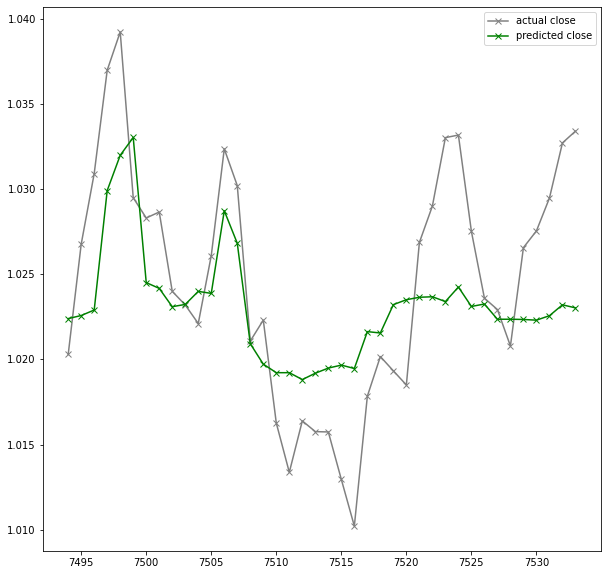

In [358]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
line1 = plt.plot(df_t.test, label = 'actual close', marker='x', color='grey')
#include actual high and low range

line2 = plt.plot(df_t.pred, label = 'predicted close', marker='x', color='g')
plt.legend()
plt.show()
 

In [359]:
#include actual high and low range
df_t['test_high']=df_raw1.iloc[-40:,2:3].shift(-1)
df_t['test_low']=df_raw1.iloc[-40:,3:4].shift(-1)
df_t

,test,pred,test_high,test_low
7494,1.02029,1.022398,NaN,NaN
7495,1.02677,1.022580,1.02884,1.01797
7496,1.03092,1.022902,1.03383,1.02582
7497,1.03699,1.029922,1.03850,1.02996
7498,1.03924,1.031992,1.04021,1.03602
7499,1.02950,1.033039,1.04010,1.02925
7500,1.02831,1.024515,1.03225,1.02645
7501,1.02866,1.024173,1.03005,1.02639
7502,1.02400,1.023098,1.03150,1.02369
7503,1.02320,1.023232,1.02686,1.02132


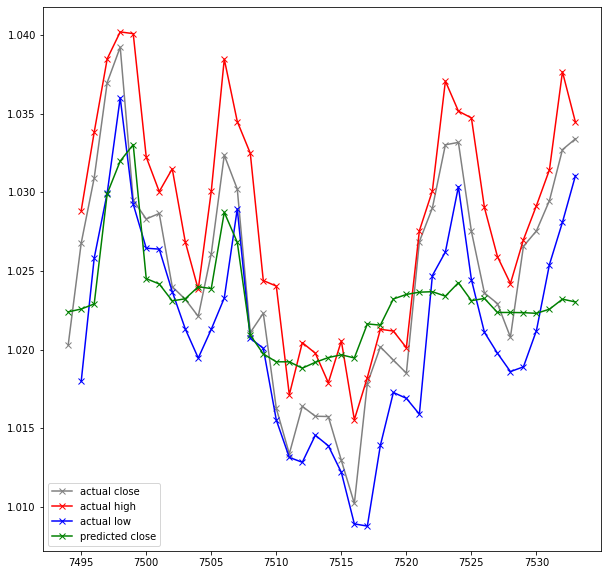

In [360]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
line1 = plt.plot(df_t.test, label = 'actual close', marker='x', color='grey')
#include actual high and low range
line1_h = plt.plot(df_t.test_high, label = 'actual high', marker='x', color='r')
line1_l = plt.plot(df_t.test_low, label = 'actual low', marker='x', color='b')

line2 = plt.plot(df_t.pred, label = 'predicted close', marker='x', color='g')
plt.legend()
plt.show()
 

In [361]:
# clears the model after a run so you can contrast new runs.
# predictor.unpersist_models('ag_predict_interval')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
%rm -rf AutogluonModels, ag_predict_interval
!ls

agModels-predictClose
EURCHF_Daily_199304280000_202205050000.csv
GBPAUD_Daily_200708210000_202205060000.csv
GBPJPY_Daily_199304190000_202205050000.csv
sample_data
